# I. Introduction

## i. Background Information


The data we chose is the 2017 World Wushu Championships. Wushu, also known as Chinese Kungfu, is a hard and soft martial arts as well as a full-contact sport. It was originated in China seventy years ago, but developed rapidly among different countries in the world. Wushu is composed of two disciplines: Taolu(forms) and Sanda(sparring). We will briefly introduce these two disciplines and how they are graded in the competition.

In terms of Taolu, competitors are judged and given points based on their acrobatic movements and techniques. The forms comprise basic movements, such as kicks, punches, balances, and jumps. It can also be changed for competitions in order to highlight their strengths and avoid their weaknesses. Competitors have time limits which ranges from one minute to 4 minutes. In terms of Sanda, also known as Sanshou, it is a modern fighting method and a full contact sport. It contains boxing, kicks, and wrestling. It lies more in the category of combat aspects of wushu.

In the 2017 World Wushu Championships dataset, the discipline is Taolu. It involves in five events-- Changquan, Gunshu, Jianshu, Qiangshu, and Daoshu. Changquan refers to Long Fist, which emphasizes on extended kicks and striking techniques; Gunshu, the stick acrobatic play, practices the skills of sweeping and playing the rod or stick; Jianshu is when the player uses a Jian (straight sword) in the routine; Qiangshu refers to the Wushu form with the use of spears; Daoshu is when the player performs the routine with a broadsword. In international competitions, junior-level players have the same routine in individual event, in which they perform identical movements, while senior-level players have self-choreographed routines that contains different movements that may have different difficulty level with the others. In this dataset, the players played as senior-level players.

## ii. Discussion of Variables


In order to better understand the dataset, we will also describe each variable. The dataset contains 17 variables. “Name”,”Gender”, and “Country” describe each player’s personal information. As mentioned earlier, there is a “Event” variable that indicates which of the five competition events each player participated. “A_Score” measures the quality of movements, which is out of 5 points; “B_Score” measures the overall performance of the players’ routine, which is out of 3 points, and it is relatively subjective compared to the other scores; “C_Score” measures the degree of difficulty, which is out of 2 points. “Overall_Score” is the sum of A, B, C scores, so the maximum possible “Overall_Score” is 10 points. There is also a “Rank” variable which is the rank of each player in each competition event. The higher the “Overall_Score”, the higher the “Rank”. The dataset also includes a variable “PlaceCat” to categorize each rank into a place category, such as top 10 and top 20.

In a Wushu competition, A score is calculated based on a point deduction rule: 1 error will result in 0.1 point deduction. The variable “A_Ded_Cnt” provides the number of errors in each player’s performance. The variable “B_Score_Cnt” categorizes B scores into three categories: a score of 2.51-3 points fall into the superior category; 1.91-2.50 points fall into the average category; and 1.01-1.90 points fall into the inferior category. C score is based on the movement completion, and is related to variables: “Nandu_Miss”, “Nandu_Total”, and “Nandu_Completed”. “Nandu_Total” refers to the number of difficult movements attempted in a player’s routine, and “Nandu_Miss” is the number of difficult movements that player missed. “Nandu_Completed” is calculated by: (“Nandu_Total” - “Nandu_Miss”) / (“Nandu_Total”).

“Time” is measured in minutes. For example, 1.40 means the player performed 1 minute and 40 seconds. Another variable to mention is “Region”, which categorizes each country by region. Additionally, there are certain countries that are categorized as individual regions: China, Russia, and India. They are not included in the region “Asia” because these countries have many players that participated in this year’s competition.


## iii. General Information of the Dataset


The 2017 World Wushu Championships dataset is the competition record of each player at each event. There are 108 players participated in the 2017 World Wushu Championships Competition, and each player can sign up for more than one competition event.

In the dataset, each row is an observational unit: one row for each player in one event. Thus a player who has performed in three different events will have three rows in the dataset. The data is officially provided by the International Wushu Federation (IWUF) and Justtool. In this competition, 87 players participated in Changquan (Longfist), 35 players participated in Daoshu (Broadsword), 35 players participated in Gunshu(Staff), 27 players participated in Jianshu (Straight Sword), and 23 players participated in Qiangshu (Spear).

Previous Wushu research demonstrates that usually most of the players can reach an overall score of 9.0 or higher. The difference between each player’s overall score is not noticeably large. That motivates us to explore more interesting relationships between each variable and discover which are the factors that are significant in predicting a player’s place category in future competitions. Except for 'A_Score', 'B_Score', 'C_Score', 'B_Score_Cat', 'A_Ded_Cnt', and 'Nandu_Completed' which directly affect a player's Place Category, for now, we assume that other variables are potentiallly influential to the Place Category. We will provide further justifications on our assumptions in the following analysis.

# II. Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium
from folium import Map
from sklearn.model_selection import train_test_split
import os
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
import mord as m

In [2]:
wushu = pd.read_csv('WWC17.csv')
wushu.head()

,Name,Country,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,PlaceCat,Region,Event,Gender,B_Score_Cat,A_Ded_Cnt,Nandu_Miss,Nandu_Total,Nandu_Completed
0,Zhizhao Chang,CHN,9.70,1,5.0,2.70,2.0,1.40,Gold,China,Changquan (Longfist),M,Superior,0,0,9,100%
1,Achmad Hulaefi,INA,9.64,2,5.0,2.64,2.0,1.26,Top10,Asia,Changquan (Longfist),M,Superior,0,0,12,100%
2,Pavel Muratov,RUS,9.63,3,5.0,2.63,2.0,1.25,Top10,Russia,Changquan (Longfist),M,Superior,0,0,11,100%
3,Wai Kin Yeap,MAS,9.62,4,5.0,2.62,2.0,1.41,Top10,Asia,Changquan (Longfist),M,Superior,0,0,12,100%
4,Hibiki Betto,JPN,9.58,5,5.0,2.58,2.0,1.27,Top10,Asia,Changquan (Longfist),M,Superior,0,0,12,100%


## i. Summary Statistics and Variables Distribution

In [3]:
wushu.describe()

,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,A_Ded_Cnt,Nandu_Miss,Nandu_Total
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,9.021353,18.801932,4.734300,2.467729,1.819324,1.334686,2.512077,0.975845,11.734300
std,0.611582,11.740908,0.246593,0.160875,0.297830,0.116539,2.250911,1.429372,1.000938
min,5.700000,1.000000,3.500000,1.700000,0.200000,1.210000,0.000000,0.000000,5.000000
25%,8.740000,9.000000,4.600000,2.370000,1.700000,1.280000,1.000000,0.000000,12.000000
50%,9.170000,18.000000,4.800000,2.490000,2.000000,1.320000,2.000000,0.000000,12.000000
75%,9.450000,27.000000,4.900000,2.600000,2.000000,1.370000,4.000000,2.000000,12.000000
max,9.720000,50.000000,5.000000,2.720000,2.000000,2.370000,12.000000,8.000000,14.000000


### Number of Unique Players

In [4]:
wushu['Name'].nunique()

108

There are 108 unique players in total, and there are 207 obervational units. Meaning some of the players have participated in more than one event.

### Number of Players in Each Event

In [5]:
wushu.groupby(['Event'])['Name'].count()

Event
Changquan (Longfist)       87
Daoshu (Broadsword)        35
Gunshu (Staff)             35
Jianshu (Straightsword)    27
Qiangshu (Spear)           23
Name: Name, dtype: int64

### Average Overall Score of the Players in Each Event

In [6]:
wushu.groupby(['Event']).Overall_Score.mean()

Event
Changquan (Longfist)       9.015057
Daoshu (Broadsword)        8.888857
Gunshu (Staff)             9.198571
Jianshu (Straightsword)    8.989630
Qiangshu (Spear)           9.014348
Name: Overall_Score, dtype: float64

The average overall score of the players is the highest in Jianshu event and the lowest in Daoshu event.

### Average A, B and C Score in Each Event

In [7]:
wushu.groupby(['Event'])['A_Score','B_Score','C_Score'].mean()

,A_Score,B_Score,C_Score
Event,,,
Changquan (Longfist),4.693103,2.469655,1.852299
Daoshu (Broadsword),4.748571,2.421714,1.718571
Gunshu (Staff),4.825714,2.540000,1.832857
Jianshu (Straightsword),4.722222,2.445185,1.822222
Qiangshu (Spear),4.743478,2.446957,1.823913


Players in the Gunshu event usually have a higher A score and B score. Players in the Changquan event usually have a higher C score.

### Boxplot of A, B and C Score

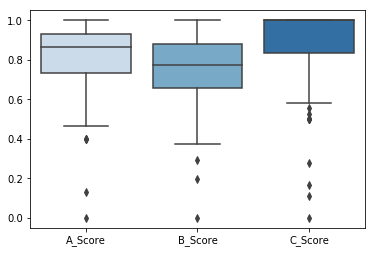

In [8]:
# Standardize A, B and C Scores.
Ascore = (wushu['A_Score'] - wushu['A_Score'].min())/(wushu['A_Score'].max() - wushu['A_Score'].min())
Bscore = (wushu['B_Score'] - wushu['B_Score'].min())/(wushu['B_Score'].max() - wushu['B_Score'].min())
Cscore = (wushu['C_Score'] - wushu['C_Score'].min())/(wushu['C_Score'].max() - wushu['C_Score'].min())

wushu2 = wushu.copy()
wushu2["A_Score"] = Ascore
wushu2["B_Score"] = Bscore
wushu2["C_Score"] = Cscore 

# Create a Combined Boxplot
sns.boxplot(data=wushu2.loc[:,["A_Score", "B_Score","C_Score"]], palette="Blues")

We standardized all three scores into a scale of 0-1 in order to better compare them. Relatively, B_score is more variant(spreading out), which means that it is more influential in differentiating the ranking among players.

### Distribution of A Deduction Counts

Text(0.5, 1.0, 'Distribution of A Deduction Counts')

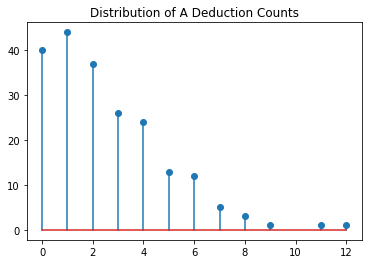

In [9]:
values =pd.DataFrame(wushu.A_Ded_Cnt.value_counts())
x = values.index.values
plt.stem(x,values)
plt.title('Distribution of A Deduction Counts')

Most players have 0 to 4 counts of A score deduction, which means their A score are deducted by 0 to 0.4 points. A few players have A score deducted more than 0.6 points.

### Distribution of B Score Categories

Text(0.5, 1.0, 'Distribution of B Score Category')

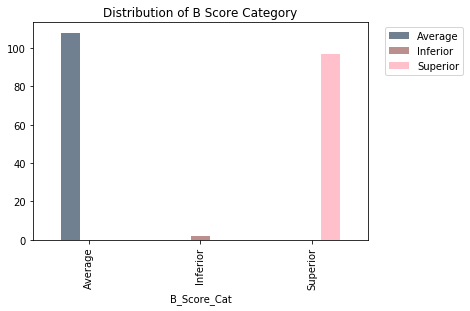

In [10]:
place_region = wushu.groupby('B_Score_Cat').B_Score_Cat.value_counts().unstack()
place_region.plot.bar(stacked = False,color = ['slategrey','rosybrown','pink','indianred','lightblue','mediumslateblue','khaki','y','tan'])
plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.title('Distribution of B Score Category')

Most players earned B scores in the category average and superior, meaning most of them earned B scores higher than 1.9 out of 3 points.

### Distribution of Nandu Total

Text(0.5, 1.0, 'Distribution of Nandu_Total')

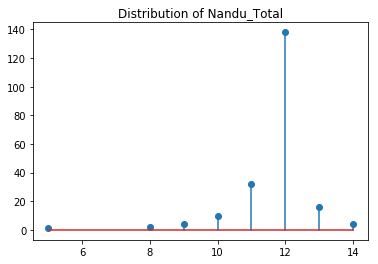

In [11]:
values =pd.DataFrame(wushu.Nandu_Total.value_counts())
x = values.index.values
plt.stem(x,values)
plt.title('Distribution of Nandu_Total')

The variable Nandu_Total is in the range of 5 to 14, with one possible outlier (Nandu_Total = 5) is far from the other observations. A majority of the players attempted 12 difficult movements in their routines. We decide to remove the possible outlier so that it would not affect our future analysis to deviate from the true result based on the limited dataset.

### Outlier Removing - 'Nandu_Total'

In [12]:
wushu.loc[wushu.Nandu_Total == 5]

,Name,Country,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,PlaceCat,Region,Event,Gender,B_Score_Cat,A_Ded_Cnt,Nandu_Miss,Nandu_Total,Nandu_Completed
156,Renato Baio,BEL,7.04,35,4.6,2.24,0.2,1.44,Top40,Europe,Gunshu (Staff),M,Average,4,4,5,20%


Text(0.5, 1.0, 'Distribution of Nandu_Total')

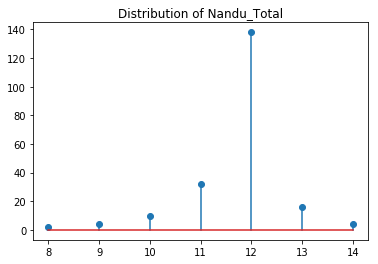

In [13]:
#### Remove the one possible outlier in the dataset
wushu = wushu.drop(wushu.index[156], axis = 0)
wushu = wushu.reset_index()
values =pd.DataFrame(wushu.Nandu_Total.value_counts())
x = values.index.values
plt.stem(x,values)
plt.title('Distribution of Nandu_Total')

### Average Nandu Total in Each Event

In [14]:
wushu.groupby(['Event']).Nandu_Total.mean()

Event
Changquan (Longfist)       11.850575
Daoshu (Broadsword)        11.542857
Gunshu (Staff)             11.794118
Jianshu (Straightsword)    11.740741
Qiangshu (Spear)           11.782609
Name: Nandu_Total, dtype: float64

The average 'Nandu_Total' in each event are very close, so the average difficult movements players attempted in each event are very close. This suggests that there is no correlation between 'Nandu_Total' and 'Event'.

### Distribution of Time

Text(0.5, 1.0, 'Distribution of Time')

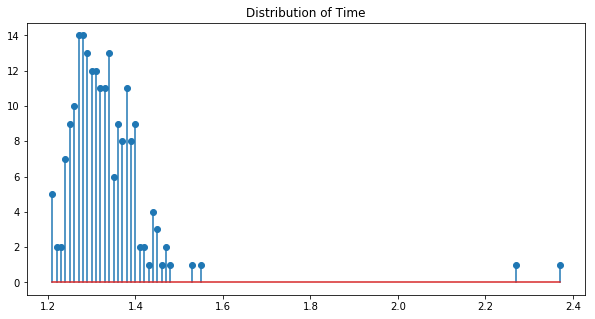

In [15]:
values =pd.DataFrame(wushu.Time.value_counts())
x = values.index.values
plt.figure(figsize=(10,5))
plt.stem(x,values)
plt.title('Distribution of Time')

Time is ranged from 1.2 to 2.4, while there are two possible outliers far away from the majority distribution. We decide to remove the possible outliers.

### Outliers Removing - 'Time'

In [16]:
wushu.loc[wushu.Time >= 2.2]

,index,Name,Country,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,PlaceCat,Region,Event,Gender,B_Score_Cat,A_Ded_Cnt,Nandu_Miss,Nandu_Total,Nandu_Completed
66,66,Thi Phuong Giang Hoang,VIE,9.17,17,4.9,2.57,1.70,2.37,Top20,Asia,Changquan (Longfist),F,Superior,1,2,11,82%
110,110,Eric Anthony Luong,CAN,8.97,24,5.0,2.42,1.55,2.27,Top30,America,Daoshu (Broadsword),M,Average,0,2,14,86%


Text(0.5, 1.0, 'Distribution of Time')

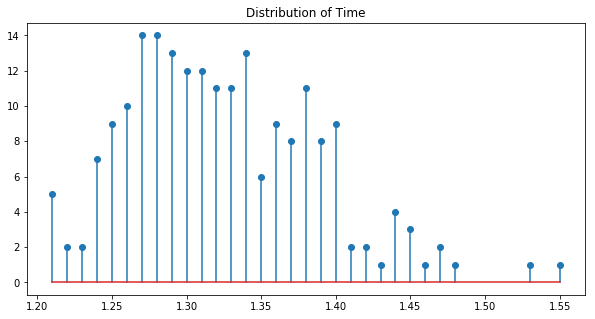

In [17]:
wushu = wushu.drop(wushu.index[[66, 110]], axis = 0)
wushu = wushu.reset_index()
values =pd.DataFrame(wushu.Time.value_counts())
x = values.index.values
plt.figure(figsize=(10,5))
plt.stem(x,values)
plt.title('Distribution of Time')

### Average Time in Each Event

In [18]:
wushu.groupby(['Event']).Time.mean()

Event
Changquan (Longfist)       1.310000
Daoshu (Broadsword)        1.327059
Gunshu (Staff)             1.322647
Jianshu (Straightsword)    1.342222
Qiangshu (Spear)           1.356957
Name: Time, dtype: float64

We can see that the average time players used in each event does not seem to differ much.


### Distribution of the Number of Players From Each Country

<Figure size 7200x720 with 0 Axes>

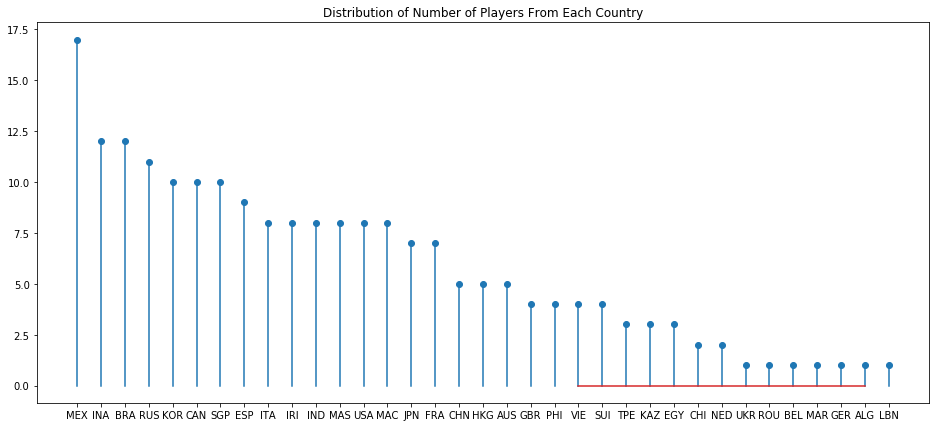

<Figure size 7200x720 with 0 Axes>

In [19]:
values =pd.DataFrame(wushu.Country.value_counts().astype('int'))
x = values.index.values
plt.figure(figsize=(16,7))
plt.stem(x,values)
plt.title('Distribution of Number of Players From Each Country')
plt.figure(figsize=(100,10))

The distribution is very skewed. Mexico has the largest number of players, while Romania has the least number of players in this competition.

### Distribution of the Number of Players From Each Region

<Figure size 7200x720 with 0 Axes>

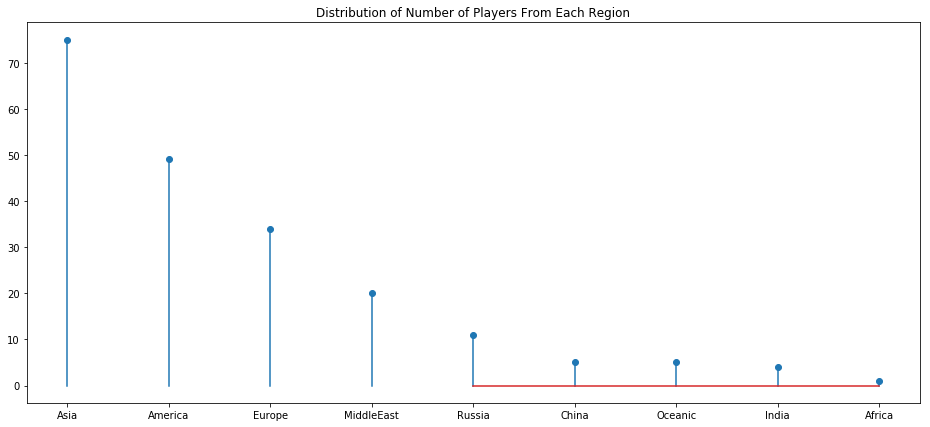

<Figure size 7200x720 with 0 Axes>

In [20]:
values =pd.DataFrame(wushu.Region.value_counts().astype('int'))
x = values.index.values
plt.figure(figsize=(16,7))
plt.stem(x,values)
plt.title('Distribution of Number of Players From Each Region')
plt.figure(figsize=(100,10))

Similar to the Distribution of the Number of Players From Each Country, this distribution is very skewed. Aisa has the largest number of players, while Africa has the least number of players in this competition.

## ii. Potential Relationships

### Diagonal Correlation Matrix of Numeric Variables

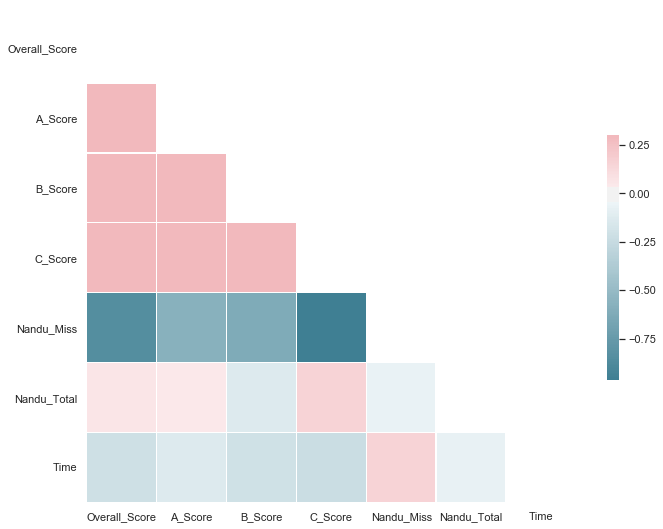

In [21]:
sns.set(style="white")

corr = wushu.loc[:,['Overall_Score',"A_Score",'B_Score','C_Score','Nandu_Miss','Nandu_Total','Time']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})



From the diagonal correlation matrix, red reflects positive correlation; blue reflects negative correlation; white reflects no correlation. Because A_Score have a direct relationship with A_Deduction_Cnt, we decided to only include A_Score for simplicity. So the variables include: A,B,C Score, Nandu_Miss, Nandu_Total, Time, Overall_Score. For example, A,B,C Score all have strong positive relationship with Overall_Score; Nandu_Miss has strong negative relationship with Overall_Score. This makes sense the more difficult movements failed, the less score it would be. For the “Time” variable, we can see it has a slight negative correlation with overall score and slight positive correlation with “Nandu_Miss.” This might be because that the more time the player performs, the more potential difficult movements he will attempt, so that the probability of failing the movements will increase, which results in a lower score.

Nandu_Miss is the most correlated variable with score. We assume that Nandu_miss is an influential factor, because the more difficult movements one player misses, the lower C_score the player will earn. Nandu_Miss is directly and highly related to one player’s rank and place category. Therefore, we want to further analyze unobvious relationship such as relationship between player’s performance and Nandu_Total. Since place category (categorical variable) is the classification of rank (numerical data), we use rank to build linear regression with Nandu_Total.

<br>

### Linear Regression Plot of Nandu_Miss and Rank

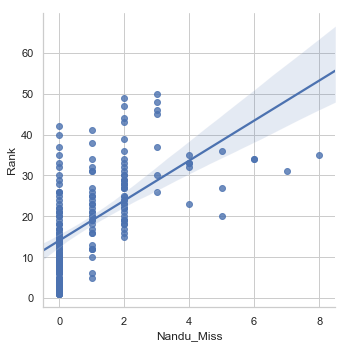

In [22]:
sns.set(style = 'whitegrid')
sns.lmplot(x = 'Nandu_Miss', y='Rank', data = wushu)

This plot dmeonstrates that there is a linear relationship between 'Nandu_Miss' and 'Rank'. So it is considered to be an influential factor in predicting the 'PlaceCat' of a player. We then continue to explore the 'Nandu_Total' variable.

### Linear Regression Plot of Nandu_Total and Rank

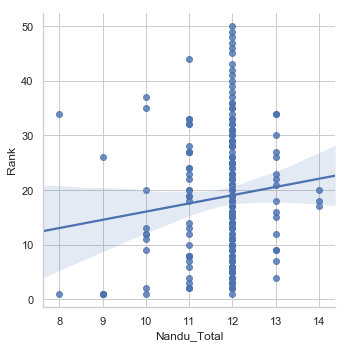

In [23]:
sns.set(style = 'whitegrid')
sns.lmplot(x = 'Nandu_Total', y='Rank', data = wushu)

There is a negative relationship between 'Nandu_Total' and 'Rank' becomes more obvious. Thus, we decided to consider 'Nandu_Total' as one of the factors that influences a player's 'PlaceCat'.

### Linear Regression Plot of Nandu_Total and Rank, Blocked by Gender.  

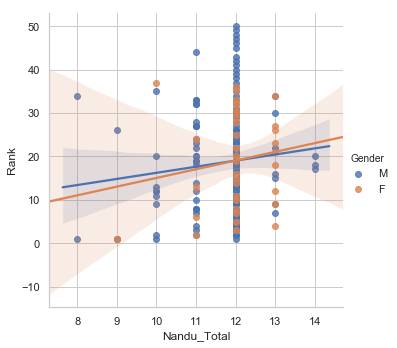

In [24]:
sns.set(style = 'whitegrid')
sns.lmplot(x = 'Nandu_Total', y='Rank', hue = "Gender", data = wushu)

After fitting rank with Nandu_Total, we want to see if gender plays a role in affecting the true relationship. The graph shows that the negative linear relationships between number of difficult movements attempted and player’s rank are very similar for both genders. The less difficult movements they attempted, the slightly higher ranks tend to be. We also observed that female’s confidence interval is higher than male, and this is because the sample size of female (37) is lower than male (170), so the variance of female is higher. Since the relationships of both genders are very close, we can assume that gender is not an influential factor in affecting the place category.

### Boxplot of Overall_Score Grouped by Gender

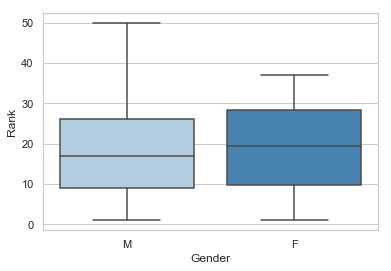

In [25]:
sns.boxplot( x=wushu["Gender"], y=wushu["Rank"], palette="Blues")

The medians and the interquartile ranges of two boxplots are very close to each other. This justifies that gender has no effect on a player's rank and place category.

### Distribution of Place Category for Each Country

In [26]:
cat_by_country = wushu.groupby('PlaceCat').Country.value_counts().unstack()
cat_by_country[np.isnan(cat_by_country)]=0
cat_by_country = cat_by_country.astype('int')
cat_by_country

Country,ALG,AUS,BEL,BRA,CAN,CHI,CHN,EGY,ESP,FRA,...,NED,PHI,ROU,RUS,SGP,SUI,TPE,UKR,USA,VIE
PlaceCat,,,,,,,,,,,,,,,,,,,,,
Gold,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Top10,0,0,0,0,2,0,0,0,0,0,...,0,0,0,5,6,0,2,0,1,2
Top20,0,0,0,5,3,0,0,1,1,3,...,1,2,0,5,3,0,0,1,4,2
Top30,0,4,0,6,2,0,1,1,4,2,...,0,1,0,1,1,3,1,0,2,0
Top40,1,1,1,1,2,2,0,0,3,0,...,1,0,1,0,0,1,0,0,1,0
Top50,0,0,0,0,1,0,0,1,1,2,...,0,1,0,0,0,0,0,0,0,0


From the table above, we notice that there are too many entries that are zero. This is because our sample size is not large enough if we interpret the 'Country' variable. Since there are many unique values in the "Country" Variable and the number of our observations is not very large, it is not informative and useful to study the relationship between 'Country' and other variables. In this case, we decided to use 'Region' instead of 'Country' to conduct further analysis.
<br>

### Distribution of Place Category for Each Region

Text(0.5, 1.0, 'Distribution of Place Category for Each Region')

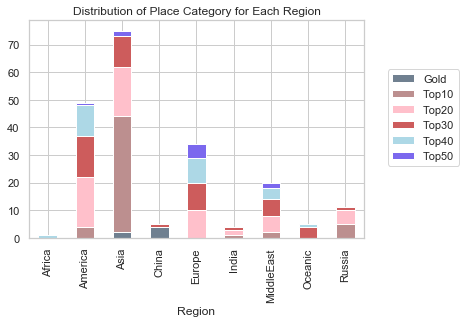

In [27]:
by_region = wushu.loc[:,['Country','Region','PlaceCat']].groupby('Region').PlaceCat.value_counts().unstack()
by_region.plot.bar(stacked = True, color = ['slategrey','rosybrown','pink','indianred','lightblue','mediumslateblue','khaki','y','tan'])
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.title('Distribution of Place Category for Each Region')

### Bubble Map of the Number of Top 30 or Higher for Each Region

In [28]:
#### Create a column of each region's total number of players who ranked higher than top30.

place = wushu.groupby('Region').PlaceCat.value_counts().unstack().loc[:,['Gold','Top10','Top20','Top30']]
place[np.isnan(place)]=0
place['Players_count'] = place['Gold'] + place['Top10'] + place['Top20'] + place['Top30']
place = place.drop(['Oceanic']) # drop Oceanic which has no players ranked higher than top30.
place

PlaceCat,Gold,Top10,Top20,Top30,Players_count
Region,,,,,
Africa,0.0,0.0,0.0,0.0,0.0
America,0.0,4.0,18.0,15.0,37.0
Asia,2.0,42.0,18.0,11.0,73.0
China,4.0,0.0,0.0,1.0,5.0
Europe,0.0,0.0,10.0,10.0,20.0
India,0.0,1.0,2.0,1.0,4.0
MiddleEast,0.0,2.0,6.0,6.0,14.0
Russia,0.0,5.0,5.0,1.0,11.0


In [29]:
# Create a bubble map.

place['Long'] = [-8.7832,37.0902,34.0479,39.913818,54.5260,20.5937,28.364751,61.5240]
place['Lat'] = [34.5085,-95.7129,100.6197,116.363625,15.2551,78.9629,44.23365,105.3188]

data = place.loc[:,['Players_count','Long','Lat']]
data['Region']=['Africa','America','Asia','China','Europe','India','MiddleEast','Russia']
data

PlaceCat,Players_count,Long,Lat,Region
Region,,,,
Africa,0.0,-8.783200,34.508500,Africa
America,37.0,37.090200,-95.712900,America
Asia,73.0,34.047900,100.619700,Asia
China,5.0,39.913818,116.363625,China
Europe,20.0,54.526000,15.255100,Europe
India,4.0,20.593700,78.962900,India
MiddleEast,14.0,28.364751,44.233650,MiddleEast
Russia,11.0,61.524000,105.318800,Russia


In [73]:

p_map = Map(location=[30,30], tiles="cartodbpositron", zoom_start=2)

for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['Long'], data.iloc[i]['Lat']],
      popup=data.iloc[i]['Region'],
      radius=data.iloc[i]['Players_count']*20000,
      color='Lightblue',
      fill=True,
      fill_color='crimson'
   ).add_to(p_map)
p_map


After exploring the distribution of place category for each country, we want to take a closer look at what the distribution will be like for regions instead of countries.
In the bar plot, it is clearer that China has the most Gold place, and Asia has the most Top 10, followed by America and then Europe. The map shows that Asia, America, and Europe are dominant in place Top 30 and above. Since each place category is not evenly distributed for each region. We consider 'Region' to be one of the influential factors to the Place Category of a player. 

After looking at the distribution of place categories for each region, we are curious if the distribution is the same for each region in each event.

Looking at 'Region' and 'Name' variables, we found some players with Asian names still in non-Asian regions. This might be a potential problem when we analyze the relationship between regions and place category, so we will try to explore these variables into more depth.

### Wordcloud of Players' Last Names

In [31]:
countries = wushu.loc[:,['Name','Country','Region']]

# extract last name
names = countries.iloc[:,0].astype('str')
countries['last_names'] = countries['Name'].str.split().str[-1].str.strip()
last_names = countries.loc[:,'last_names']
last_names_str = ' '.join(last_names)
last_names_str = last_names_str.split(" ")


import multidict as multidict
name_dict = multidict.MultiDict()
d = {}
for text in last_names_str:
    val = d.get(text, 0)
    d[text] = val + 1
for key in d:
    name_dict.add(key, d[key])

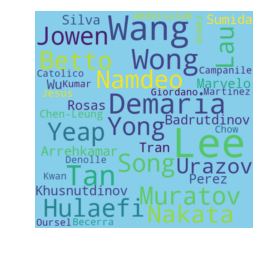

In [32]:
text=(last_names_str)
cloud = WordCloud(width=480, height=480, margin=0,background_color="skyblue",max_font_size=90, min_font_size=20)
cloud.generate_from_frequencies(name_dict)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Many of the asian names stand out, such as Lee, Song, and Yong, so we group players by their last names to determine if there are Asian originated or not.

### Compare the Asian-Orignated Players and Nonasian-Originated Players
#### - Create a New Binary Variable: is_asian: 1 represents yes; 0 represents no

In [33]:
score_by_lastname = wushu.loc[:,['Name','Overall_Score','A_Score','B_Score','C_Score']]
names = score_by_lastname.iloc[:,0].astype('str')
score_by_lastname['last_names'] = score_by_lastname['Name'].str.split().str[-1].str.strip()
last_names = score_by_lastname.loc[:,'last_names']
last_names_str = ' '.join(last_names)
score_by_lastname.head()
Avg_OverallScore_with = score_by_lastname.groupby(last_names).Overall_Score.mean().sort_values(ascending=False)
#print(Avg_OverallScore_with)


# Create a new column: is asian: 1 represents yes; 0 represents no
is_asian = {'Chang':1, 'Hulaefi':0, 'Muratov':0, 'Yeap':1, 'Betto':0, 'Jowen':1, 'Yong':1,
       'Lau':1, 'Lee':1, 'Wang':1, 'Wong':1, 'Song':1, 'Cho':1, 'Namdeo':0, 'Nakata':0,
       'Urazov':0, 'Khusnutdinov':0, 'Badrutdinov':0, 'Tran':1, 'Sharma':0, 'Wu':1,
       'Rosas':0, 'Arrehkamar':0, 'Silva':0, 'Marvelo':0, 'Sumida':0, 'Perez':0,
       'Chen-Leung':1, 'Demaria':0, 'Coutinho':0, 'Jesus':0, 'Campanile':0, 'Chow':1,
       'Mokhtarpourdehkordi':0, 'Gomez':0, 'Tang':1, 'Becerra':0, 'Oursel':0,
       'Denolle':0, 'Kumar':0, 'Mak':0, 'Giordano':0, 'Catolico':0, 'Martinez':0,
       'Kwan':1, 'Abdelsalam':0, 'Ajhory':0, 'Liu':1, 'Li':1, 'Yamaguchi':0,
       'Santoso':0, 'Duong':1, 'Seo':1, 'Sou':1, 'Cai':1, 'Kiani':0, 'Ikeuchi':0, 'Mui':1,
       'Phoon':1, 'Zheng':1, 'Lim':1, 'Tereshchenko':0, 'Hoang':1, 'Tian':1, 'Loh':1,
       'Vauchez':0, 'Macuha':0, 'Lo':1, 'Je':1, 'Rajabi':0, 'Ngangom':0, 'Rigal':0,
       'Derendinger':0, 'Konstantinova':0, 'Santos':0, 'Arenas':0, 'Palma':0,
       'Milla':0, 'Mendez':0, 'Nseir':0, 'Luong':1, 'Tan':1, 'Urzainqui':0, 'Filmer':0,
       'Toledo':0, 'Yacine':0, 'Baio':0, 'Alexandru':0, 'Maksimov':0, 'Abdelrahman':0,
       'Zhang':1, 'Boy':1, 'Okawa':1, 'Wijayanto':0, 'Huynh':1, 'Rodriguez':0}

score_by_lastname['is_asian'] = score_by_lastname['last_names'].map(is_asian)

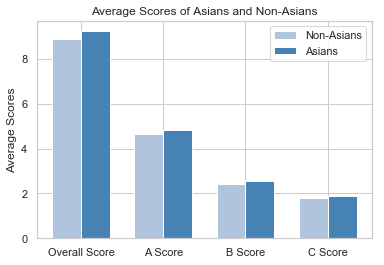

In [34]:
score_by_last_name_mean = score_by_lastname[['is_asian','Overall_Score', 'A_Score', 'B_Score', 'C_Score']].groupby('is_asian').mean()
score_by_last_name_mean

ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, score_by_last_name_mean.iloc[0], width, color='lightsteelblue')
rects2 = ax.bar(ind + width, score_by_last_name_mean.iloc[1], width, color='steelblue')

ax.set_ylabel('Average Scores')
ax.set_title('Average Scores of Asians and Non-Asians')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Overall Score', 'A Score', 'B Score', 'C Score'))

ax.legend((rects1[0], rects2[0]), ('Non-Asians', 'Asians'))

plt.show()

After groupings and finding means for Overall_Score, A, B, C Scores, we found Asians are very dominant in all three scores. It means that Asian players tend to do better in quality of movements, overall performances, and difficulties chosen. Therefore, the new variable 'is_aisan' is considered to be one of the influential factors in the place category of a player.

### Distribution of Place Categories for Each Region (Changquan)

Text(0, 0.5, 'Place Categories')

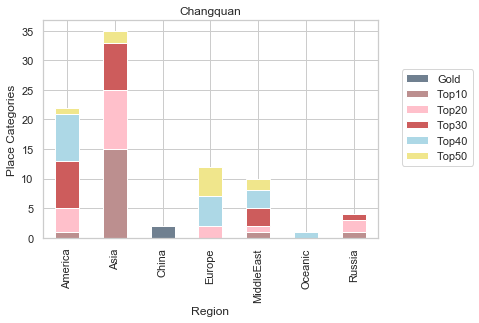

In [35]:
changquan = wushu[wushu['Event']=='Changquan (Longfist)']
changquan_by_region = changquan.loc[:,['Country','Region','PlaceCat']].groupby('Region').PlaceCat.value_counts().unstack()
changquan_by_region.plot.bar(stacked = True,color = ['slategrey','rosybrown','pink','indianred','lightblue','khaki'])
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.title('Changquan')
plt.ylabel('Place Categories')

In event Changquan (Longfist), China completely dominant the Gold place. Asia(excluding China) has the most Top 10, Top 20, and Top 30. America has many Top 30 and 40 players.

### Distribution of Place Categories for Each Region (Jianshu)

Text(0, 0.5, 'Place Categories')

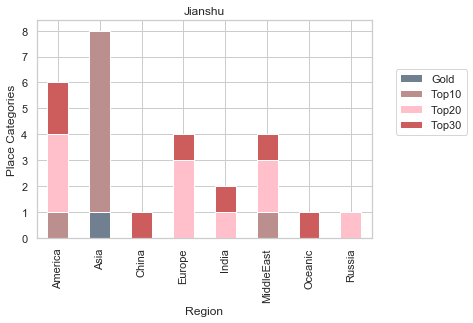

In [36]:
Jianshu = wushu[wushu['Event']=='Jianshu (Straightsword)']
Jianshu_by_region = Jianshu.loc[:,['Country','Region','PlaceCat']].groupby('Region').PlaceCat.value_counts().unstack()
Jianshu_by_region.plot.bar(stacked = True,color = ['slategrey','rosybrown','pink','indianred','lightblue','khaki'])
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.title('Jianshu')
plt.ylabel('Place Categories')

In event Jianshu (Straightsword), the distribution is similar to that of Changquan. Gold place are all won by players from China, and players from Asia owned the most Top 10, Top 20, and Top 30 places, while Oceanic players all won Top 40 places.

### Distribution of Place Categories for Each Region (Qiangshu)

Text(0, 0.5, 'Place Categories')

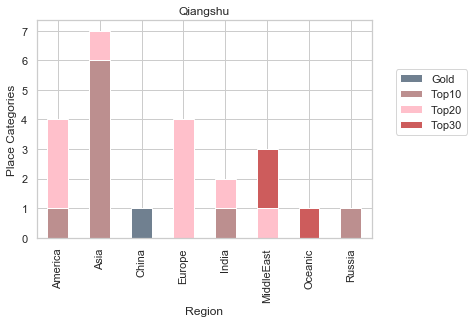

In [37]:
Qiangshu = wushu[wushu['Event']=='Qiangshu (Spear)']
Qiangshu_by_region = Qiangshu.loc[:,['Country','Region','PlaceCat']].groupby('Region').PlaceCat.value_counts().unstack()
Qiangshu_by_region.plot.bar(stacked = True,color = ['slategrey','rosybrown','pink','indianred','lightblue','khaki'])
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.title('Qiangshu')
plt.ylabel('Place Categories')

In event Qiangshu (Spear), we can spot that the distribution is slightly different from the previous two events. In this event, China is no longer dominant in the Gold places, while players from Asia (excluding China) owned all the Gold places and most of the Top 10 places. China and Europe players only have Top 30 places, and Russia players only have Top 20 places.

### Distribution of Place Categories for Each Region (Daoshu)

Text(0, 0.5, 'Place Categories')

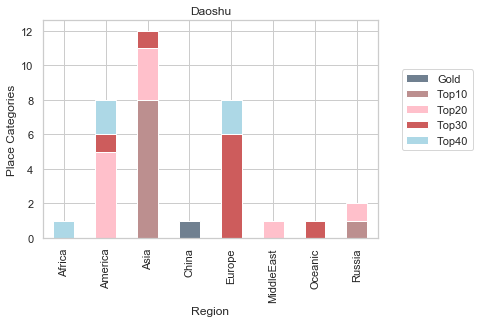

In [38]:
Daoshu = wushu[wushu['Event']=='Daoshu (Broadsword)']
Daoshu_by_region = Daoshu.loc[:,['Country','Region','PlaceCat']].groupby('Region').PlaceCat.value_counts().unstack()
Daoshu_by_region.plot.bar(stacked = True,color = ['slategrey','rosybrown','pink','indianred','lightblue','khaki'])
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.title('Daoshu')
plt.ylabel('Place Categories')

In event Daoshu (Broadsword), China is again dominant in Gold places, and Asia has most of the Top 10, and part of the Top 20 and 30. Africa players also participated in this event, and they all won Top 40 places. MiddleEast players all have Top 20; Oceanic players all have Top 30, and Russian players all have Top 10 and Top 20.

### Distribution of Place Categories for Each Region (Gunshu)

Text(0, 0.5, 'Place Categories')

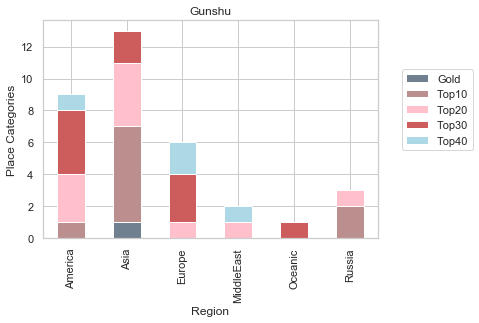

In [39]:
Gunshu = wushu[wushu['Event']=='Gunshu (Staff)']
Gunshu_by_region = Gunshu.loc[:,['Country','Region','PlaceCat']].groupby('Region').PlaceCat.value_counts().unstack()
Gunshu_by_region.plot.bar(stacked = True,color = ['slategrey','rosybrown','pink','indianred','lightblue','khaki'])
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.title('Gunshu')
plt.ylabel('Place Categories')

In event Gunshu (Staff), China did not have players participated in this event. Players from Asia have all the Gold, most of the Top 10, part of the Top 20 and 30 places. American players have similar places as the other events: from Top 10 to Top 40 places. Oceanic players all have Top 30 places.

From the five plots above, we can see that the number of players from various regions are not the same in each event, and the performance of players in each region varies in every event. Therefore, both event and region are influential factors of players’ place category in a competition.

### Linear Regression Plot between Nandu_Total and Rank, Blocked by Event. 

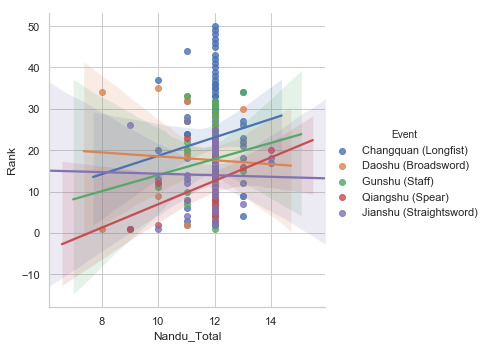

In [40]:
sns.set(style = 'whitegrid')
sns.lmplot(x = 'Nandu_Total', y='Rank', hue = "Event", data = wushu)

In event Daoshu (Broadsword) and Jianshu (Straightsword), the relationship between number of difficult movements attempted is not obvious, while the relationship between number of difficult movements attempted and player’s rank in event Gunshu (Staff) is similar to that in event Changquan (Longfist) and Qiangshu (Spear). The relationship now is negative, meaning the less difficult movements they attempted, the higher ranks tend to be. This could be because the less difficult movements one player has, the less likely one will make mistakes, so the final score could be higher even if the player attempted less difficult movements. The regression lines of each event are not overlapping. This plot justifies our conclusion above.

### Distribution of Event For Each Region

Text(0, 0.5, 'Players Counts')

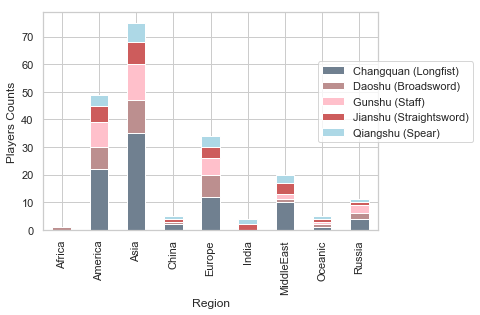

In [77]:
Event_by_region = wushu.groupby(['Region']).Event.value_counts().unstack()
Event_by_region.plot.bar(stacked = True,color = ['slategrey','rosybrown','pink','indianred','lightblue','khaki'])
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.ylabel('Players Counts')

The proportion of each event for each region is very similar, which suggests that there is no correlation between "Region" and "Event".

### Linear Regression Plot between Time and Rank

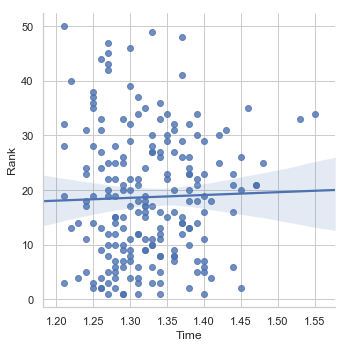

In [78]:
sns.set(style = 'whitegrid')
sns.lmplot(x = 'Time', y='Rank', data = wushu)

In this plot, the variable 'Time' is unlikely to be related to the player’s rank since the line is almost a horizontal line. There is a weak relationship between a player’s routine time and the player’s rank. Therefore, time has little influence on the player’s category, which we don't consider it to be influential.

# III. Data Modeling


Our research question is what are the factors that can help us predict the place category. We aim to predict the place category in the competition after the players finish their routines but before the judges give scores. 

From the previous exploratory analysis of  “place categories by regions” already shows us that the regions have effects on the result of place categories, we decided to include the regions to the predictive model later. Also, based on the previous exploratory, event, difficulties levels and where the player come from influence the results. Since the average performance of asian players and non-asian players differs, we will also include the variable 'is_asian' (binary) in the model.

Therefore, we decided to first include all relevant variables 'Event', 'Region', 'Nandu_Toal', 'Nandu_Miss', and 'is_asian' as our independent variables, and remove certain variables later in terms of model simplicity and accuracy. The response variable is the place category of the player: Gold, Top 10, Top 20, Top 30, Top 40, and Top 50. The model we choose is ordinal logistic regression, which uses ordinal categorical variable as dependent variable.

## Model 1


The Response Variable: PlaceCat

The Predictors: Region, Event, is_asian, Nandu_Total, Nandu_Miss.

Model 1 is our original model that includes all the predictors we considered to be influential based on our precious analysis.

We set this model as the base line, and then we did model selection, in which we exclude one variable at a time, fit a new model, and compare it with the base line until we find the best model based on the smallest mean absolute prediction error and the highest prediction accuracy score from cross-validation. 


In [63]:
y = wushu.PlaceCat.copy()
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

region = LabelBinarizer()
region_results = region.fit_transform(wushu["Region"])
encode_region = pd.DataFrame(region_results, columns=region.classes_)

event = LabelBinarizer()
event_results = event.fit_transform(wushu["Event"])
encode_event = pd.DataFrame(event_results, columns=event.classes_)

X_use = pd.concat([wushu[['Nandu_Total','Nandu_Miss']],encode_region,encode_event,score_by_lastname["is_asian"]],axis=1)
X_use.head()

,Nandu_Total,Nandu_Miss,Africa,America,Asia,China,Europe,India,MiddleEast,Oceanic,Russia,Changquan (Longfist),Daoshu (Broadsword),Gunshu (Staff),Jianshu (Straightsword),Qiangshu (Spear),is_asian
0,9,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,11,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
#### include all variables
model = m.LogisticIT() # Default parameters: alpha=1.0, verbose=0, maxiter=10000
model.fit(X_use, y)
print('Mean Absolute Error of LogisticIT %s' % metrics.mean_absolute_error(model.predict(X_use), y))

Mean Absolute Error of LogisticIT 0.5343137254901961


Text(0.5, 257.44, 'Predicted label')

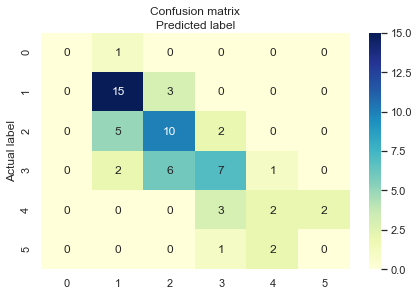

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X_use,y,test_size=0.3,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cmatrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5483870967741935


For model 1, the Accuracy Score is 0.548387, and the Mean Absolute Error is 0.534314.

## Model 2


Remove variable 'is_asian' from the model 1 to form model 2.

The Response Variable: PlaceCat

The Predictors: Region, Event, Nandu_Total, Nandu_Miss.

In [46]:
#### include Event, Region, Time, Nandu_Total, Nandu_Miss, drop is_asian.

X_use2 = X_use.copy()
X_use2 = X_use2.drop(['is_asian'],axis=1)
model.fit(X_use2, y)
print('Mean Absolute Error of LogisticIT %s' % metrics.mean_absolute_error(model.predict(X_use2), y))

Mean Absolute Error of LogisticIT 0.553921568627451


Text(0.5, 257.44, 'Predicted label')

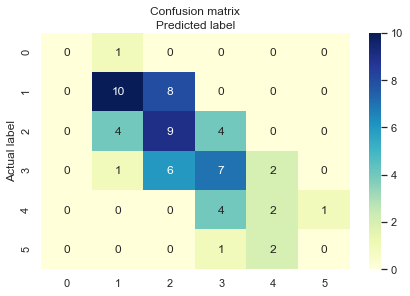

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_use2,y,test_size=0.3,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cmatrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45161290322580644



The accuracy score of model 2 is smaller than model1, and the mean absolute error score of model 2 is higher than model 1, which means dropping the variable 'is_aian' will decrease the predictive ability of our model.

Thus, we decided to keep 'is_asian' in our model.

Until now, model 1 is still our best choice.



## Model 3


Remove variable 'Nandu_Total' from model 1 to form model 3.

The Response Variable: PlaceCat

The Predictors: Region, Event, is_asian, Nandu_Miss.

In [49]:
X_use3 = X_use.copy()
X_use3 = X_use3.drop(['Nandu_Total'],axis=1)
model.fit(X_use3, y)
print('Mean Absolute Error of LogisticIT %s' % metrics.mean_absolute_error(model.predict(X_use3), y))

Mean Absolute Error of LogisticIT 0.5196078431372549


Text(0.5, 257.44, 'Predicted label')

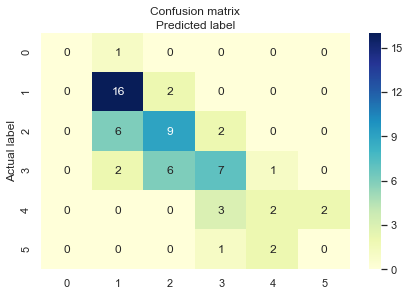

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_use3,y,test_size=0.3,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cmatrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5483870967741935



The accuracy score of model 3 is the same as model 1, however, the mean absolute error score of model 3 is lower than model 1, which means dropping the variable 'Nandu_Total' will increase the predictive ability of our model.

Thus, we decided to drop 'Nandu_Total' from our model.

Until now, model 3 becomes our best choice.

## Model 4


Remove variable 'Nandu_Miss' from model 3 to form model 4.

The Response Variable: PlaceCat

The Predictors: Region, Event, is_asian.

In [52]:
X_use4 = X_use3.copy()
X_use4 = X_use4.drop(['Nandu_Miss'],axis=1)
model.fit(X_use4, y)
print('Mean Absolute Error of LogisticIT %s' % metrics.mean_absolute_error(model.predict(X_use4), y))

Mean Absolute Error of LogisticIT 0.6470588235294118


Text(0.5, 257.44, 'Predicted label')

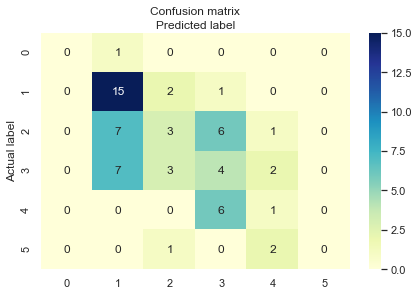

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_use4,y,test_size=0.3,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cmatrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3709677419354839



The accuracy score of model 4 is smaller than model 3, the mean absolute error score of model 4 is higher than model 3, which means dropping the variable 'Nandu_Miss' will decrease the predictive ability of our model.

Thus, we decided to keep 'Nandu_Miss' in our model.

Until now, model 3 is still our best choice.

## Model 5


Remove variable 'Event' from model 3 to form model 5.

The Response Variable: PlaceCat

The Predictors: Region, is_asian, Nandu_Miss.

In [55]:
#### include Region, Nandu_Miss, is_asian, drop event.
X_use5 = pd.concat([wushu['Nandu_Miss'], encode_region,score_by_lastname["is_asian"]],axis=1)
model.fit(X_use5, y)
print('Mean Absolute Error of LogisticIT %s' % metrics.mean_absolute_error(model.predict(X_use5), y))

Mean Absolute Error of LogisticIT 0.6372549019607843


Text(0.5, 257.44, 'Predicted label')

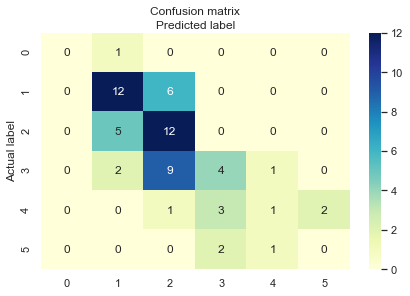

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X_use5,y,test_size=0.3,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cmatrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46774193548387094



The accuracy score of model 5 is smaller than model 3, the mean absolute error score of model 5 is higher than model 3, which means dropping the variable 'Event' will decrease the predictive ability of our model.

Thus, we decided to keep 'Event' in our model.

Until now, model 3 is still our best choice.

## Model 6


Remove variable 'Region' from model 3 to form model 6.

The Response Variable: PlaceCat

The Predictors: Event, is_asian, Nandu_Miss.

In [58]:
#### include Event, Nandu_Miss, is_asian, drop region.
X_use6 = pd.concat([wushu['Nandu_Miss'], encode_event,score_by_lastname["is_asian"]],axis=1)
model.fit(X_use6, y)
print('Mean Absolute Error of LogisticIT %s' % metrics.mean_absolute_error(model.predict(X_use6), y))

Mean Absolute Error of LogisticIT 0.6078431372549019


Text(0.5, 257.44, 'Predicted label')

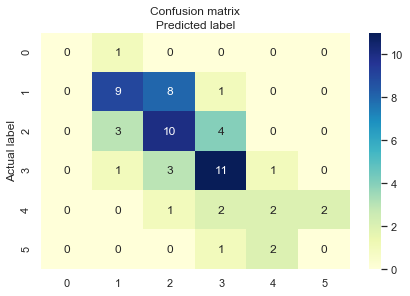

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X_use6,y,test_size=0.3,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cmatrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5161290322580645



The accuracy score of model 6 is smaller than model 3, the mean absolute error score of model 6 is higher than model 3, which means dropping the variable 'Region' will decrease the predictive ability of our model.

Thus, we decided to keep 'Region' in our model.

Until now, model 3 is still our best choice.

## Conclusion 

Both of model 1 and model 3 yields the same accuracy score of 0.548387. However, there are two reasons why we choose model 3 as our final model to predict the place category of a player in the future. First, the mean absolute error score of model 3 is 0.519608, which is lower than model 1's 0.534314. Second, in terms of model simplicity, model 3 includes fewer independent variables, which is better than model 1. Therefore, the model we selected is model 3, which contains the predictors: 'Event', 'Region', 'Nandu_Miss', and 'is_asian'.

## Future Improvement

The dataset we have right now has limited observations therefore limited information, thus a large variance and insufficient train data, resulting in inaccurate prediction outcome. For future improvement, we will consider looking for a larger dataset or external data if possible.